In [78]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import keras

In [79]:
#Import Keras module
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, advanced_activations
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [80]:
#pretty plots
%matplotlib inline

#Load the index data
raw_data = pd.read_csv('price_only.csv', skiprows=1, parse_dates=['Date']).set_index(['Date'])
raw_data.tail()

,P,P_L1,P_L2,P_L3,P_L4,P_L5,P_L6,P_L7,P_L8,P_L9,...,P_L11,P_L12,P_L13,P_L14,P_L15,P_L16,P_L17,P_L18,P_L19,P_L20
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-20,29.00,28.95,29.00,28.70,28.70,28.75,28.85,28.85,28.55,28.40,...,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20,28.15
2017-09-21,29.00,29.00,28.95,29.00,28.70,28.70,28.75,28.85,28.85,28.55,...,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20
2017-09-22,28.75,29.00,29.00,28.95,29.00,28.70,28.70,28.75,28.85,28.85,...,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55
2017-09-25,28.45,28.75,29.00,29.00,28.95,29.00,28.70,28.70,28.75,28.85,...,28.55,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65
2017-09-26,28.50,28.45,28.75,29.00,29.00,28.95,29.00,28.70,28.70,28.75,...,28.85,28.55,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50


In [81]:
raw_data.tail()

,P,P_L1,P_L2,P_L3,P_L4,P_L5,P_L6,P_L7,P_L8,P_L9,...,P_L11,P_L12,P_L13,P_L14,P_L15,P_L16,P_L17,P_L18,P_L19,P_L20
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-20,29.00,28.95,29.00,28.70,28.70,28.75,28.85,28.85,28.55,28.40,...,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20,28.15
2017-09-21,29.00,29.00,28.95,29.00,28.70,28.70,28.75,28.85,28.85,28.55,...,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20
2017-09-22,28.75,29.00,29.00,28.95,29.00,28.70,28.70,28.75,28.85,28.85,...,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55
2017-09-25,28.45,28.75,29.00,29.00,28.95,29.00,28.70,28.70,28.75,28.85,...,28.55,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65
2017-09-26,28.50,28.45,28.75,29.00,29.00,28.95,29.00,28.70,28.70,28.75,...,28.85,28.55,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50


In [82]:
#Import Fundamentals Data
fund_data = pd.read_csv('new_index_data.csv', skiprows=1, parse_dates=['Date']).set_index(['Date'])
fund_data.tail() 

,Close,High,Low,Ask,Bid,20D Vol,MA5,MA15,MA12,MA20,...,DY_LTM,DY_NTM,ADV_VOL,PAYOUT,ANALYST_SENTIMENT,EPS_GRW_FY1,EPS_GRW_FY2,PE_NTM,PE_LTM,C2D_LTM
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-20,29.00,29.00,28.85,29.00,29.00,0.578644,28.87,28.733334,28.726667,28.6825,...,3.519457,3.448702,71.997060,41.541228,2.843141,14.088559,8.561524,12.033987,12.783018,70.096026
2017-09-21,29.00,29.05,28.90,29.00,29.00,0.579540,28.93,28.766666,28.743334,28.7225,...,3.519361,3.447711,63.643789,41.558486,2.647619,14.443381,8.612556,12.042495,12.794490,70.108163
2017-09-22,28.75,28.85,28.70,28.80,28.80,0.560851,28.94,28.791666,28.743334,28.7325,...,3.545079,3.479561,5.473663,41.535936,2.726985,14.535498,8.708143,11.925671,12.712172,70.097759
2017-09-25,28.45,28.75,28.35,28.45,28.45,0.604997,28.83,28.795834,28.733334,28.7225,...,3.579625,3.521761,4.066479,41.488944,1.970657,15.178448,8.581576,11.769931,12.588001,70.101368
2017-09-26,28.50,28.50,28.20,28.50,28.50,0.595342,28.74,28.791666,28.726667,28.7225,...,3.579625,3.521761,4.066479,41.488944,1.970657,15.178448,8.581576,11.769931,12.588001,70.101368


In [83]:
#Merge 2 data source
raw_data = pd.concat([fund_data, raw_data], axis=1)

In [84]:
#Generate future price
raw_data['PRED'] = raw_data['P'].shift(-1)

In [146]:
#Split into training set and test set
train_size = 0.8 #Again parameter to tune
val_size = (1 - train_size) * 0.5
timestep = 100

#Generate labels and data
X = raw_data.iloc[:-1,:-1]
y = raw_data.iloc[:-1,-1]

In [147]:
raw_data.tail()

,Close,High,Low,Ask,Bid,20D Vol,MA5,MA15,MA12,MA20,...,P_L12,P_L13,P_L14,P_L15,P_L16,P_L17,P_L18,P_L19,P_L20,PRED
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-20,29.00,29.00,28.85,29.00,29.00,0.578644,28.87,28.733334,28.726667,28.6825,...,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20,28.15,29.00
2017-09-21,29.00,29.05,28.90,29.00,29.00,0.579540,28.93,28.766666,28.743334,28.7225,...,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.20,28.75
2017-09-22,28.75,28.85,28.70,28.80,28.80,0.560851,28.94,28.791666,28.743334,28.7325,...,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.55,28.45
2017-09-25,28.45,28.75,28.35,28.45,28.45,0.604997,28.83,28.795834,28.733334,28.7225,...,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50,28.65,28.50
2017-09-26,28.50,28.50,28.20,28.50,28.50,0.595342,28.74,28.791666,28.726667,28.7225,...,28.55,28.40,28.45,28.60,28.60,28.75,28.75,28.85,28.50,NaN


In [148]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(-1,1))
scalerX = scalerX.fit(X)
X = pd.DataFrame(scalerX.transform(X))

scalerY = MinMaxScaler(feature_range=(-1,1))
scalerY = scalerY.fit(y)
y = scalerY.transform(y)

C:\Users\bchik\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\bchik\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [149]:
#Calculate cutoff index values
train_cut_index = int(train_size * X.shape[0] - train_size * X.shape[0] % timestep)
val_cut_index = int(train_cut_index + int(val_size * X.shape[0] - val_size * X.shape[0] % timestep))
last_test_index = int(X.shape[0] - X.shape[0] % timestep)
print(train_cut_index)
print(val_cut_index)
print(last_test_index)

1900
2100
2400


In [150]:
#Spit Training, Validation and Test
X_train = np.array(X.iloc[0:train_cut_index,:])
X_val = np.array(X.iloc[train_cut_index:val_cut_index,:])
X_test = np.array(X.iloc[val_cut_index:last_test_index,:])

y_train = y[0:(train_cut_index)]
y_val = y[train_cut_index:val_cut_index]
y_test = y[val_cut_index:last_test_index]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

#Preproc the y_train and y_test using to_categorical function
#y_train = to_categorical(y_train, num_classes=3)
#y_val = to_categorical(y_val, num_classes=3)
#y_test = to_categorical(y_test, num_classes=3)

(1900, 51)
(200, 51)
(300, 51)
(1900,)
(200,)
(300,)


In [151]:
#Preproc X_train, X_val, X_test for classification
cutoff = 0.005
X_train.shape

(1900, 51)

In [152]:
#Preproc the y_train and y_test using to_categorical function
y_train_class = to_categorical(y_train, num_classes=3)
y_val_class = to_categorical(y_val, num_classes=3)
y_test_class = to_categorical(y_test, num_classes=3)

In [153]:
#Reshape data for inputting into LSTM

X_train = np.reshape(X_train, (int(X_train.shape[0]/timestep), timestep, X_train.shape[1]))
X_val = np.reshape(X_val, (int(X_val.shape[0]/timestep), timestep, X_val.shape[1]))
X_test = np.reshape(X_test, (int(X_test.shape[0]/timestep), timestep, X_test.shape[1]))

y_train = np.reshape(y_train, (int(y_train.shape[0]/timestep), timestep, 1))
y_val = np.reshape(y_val, (int(y_val.shape[0]/timestep), timestep, 1))
y_test = np.reshape(y_test, (int(y_test.shape[0]/timestep), timestep, 1))

In [154]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
earlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', min_delta=0.0001)

In [155]:
from keras.layers import LSTM
model = Sequential()

model.add(Dense(20, input_shape=X_train.shape[1:], activation='relu'))
model.add(LSTM(20, return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(LSTM(5, return_sequences=True))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

m = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=1, verbose=1, callbacks=[earlyStop])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100, 20)           1040      
_________________________________________________________________
lstm_15 (LSTM)               (None, 100, 20)           3280      
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 10)           1240      
_________________________________________________________________
lstm_17 (LSTM)               (None, 100, 5)            320       
_________________________________________________________________
dense_15 (Dense)             (None, 100, 5)            30        
_________________________________________________________________
dense_16 (Dense)             (None, 100, 1)            6         
Total params: 5,916
Trainable params: 5,916
Non-trainable params: 0
_________________________________________________________________
Train on

In [156]:
pred = model.predict(X_test)
pred = scalerY.inverse_transform(pred.flatten())


C:\Users\bchik\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [157]:
true = scalerY.inverse_transform(y_test.flatten())


C:\Users\bchik\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


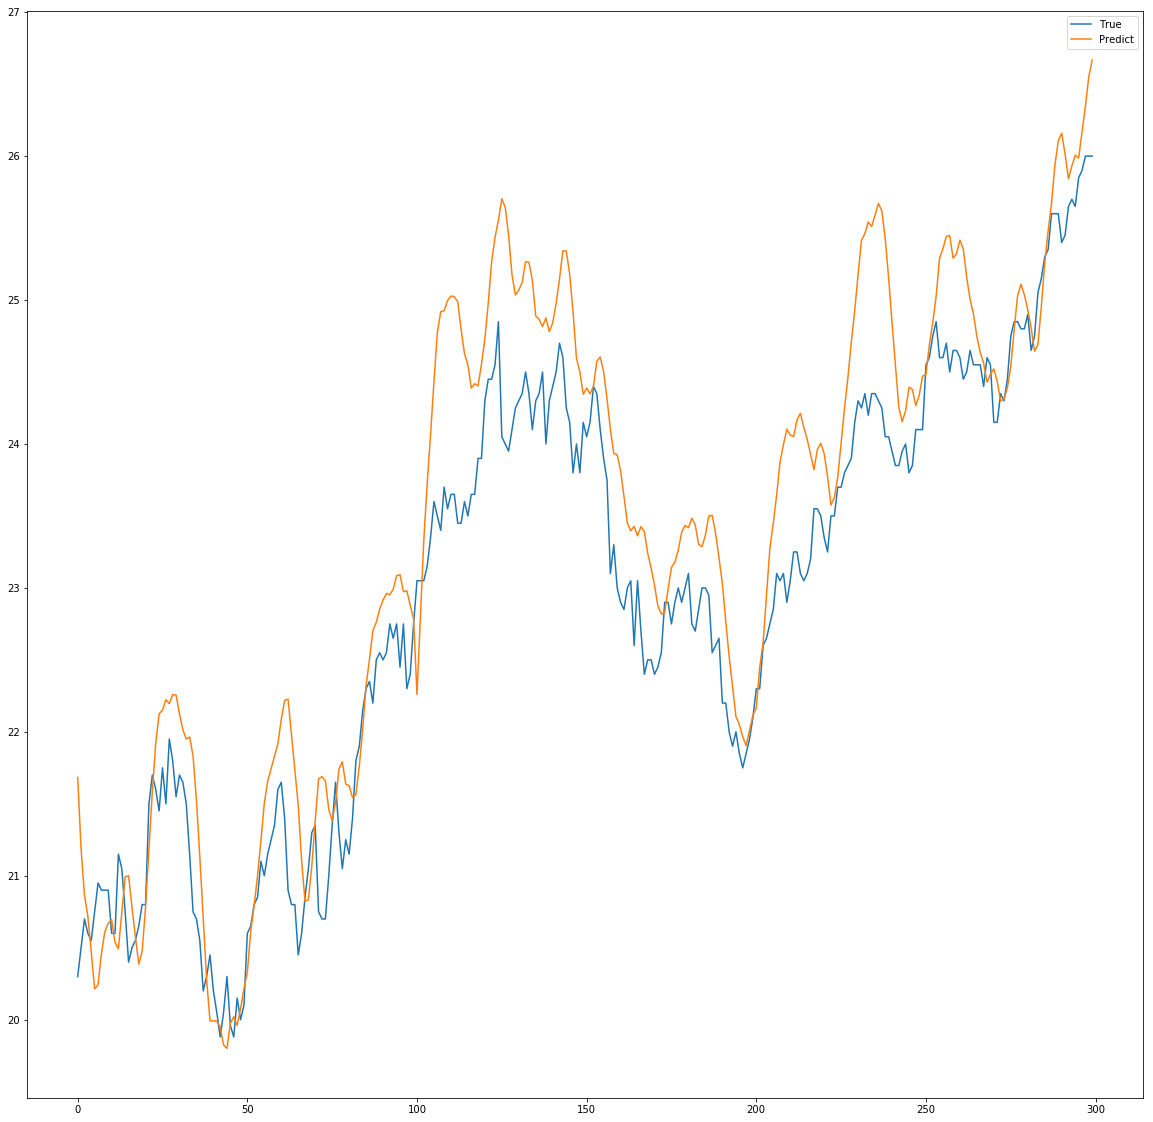

In [158]:
plt.figure(figsize=(20,20));
plt.plot(true);
plt.plot(pred);
plt.legend(['True', 'Predict']);
plt.show()

In [167]:
d = {'true': np.squeeze(true), 'pred': np.squeeze(pred)}
data = pd.DataFrame(d, index=range(0,len(true)))

In [166]:
diff = data - data.shift(-1)
pred_dir = diff['pred'] > 0
true_dir = diff['true'] > 0

In [165]:
np.sum(pred_dir == true_dir) /len(pred_dir)

0.52333333333333332

In [168]:
bm = np.zeros(len(pred_dir))

In [169]:
np.sum(bm == true_dir)/len(pred_dir)

0.64000000000000001

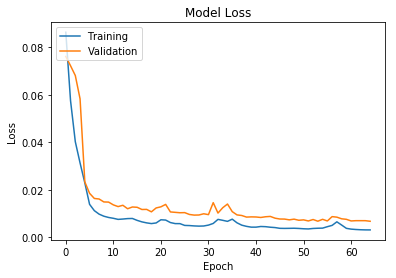

In [170]:
plt.figure(1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'], loc='upper left')